In [213]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os

In [214]:

# path = 'D:/Daniel/Lab_KHDL/Final_Project/Data/'
# frames = []   
# for file in os.listdir(path):
#     if file.endswith('.csv'):
#         file_path = os.path.join(path, file)
#         df1 = pd.read_csv(file_path, encoding='utf-8-sig')
#         frames.append(df1)

# result = pd.concat(frames, ignore_index=True)

# result.to_csv('dataFinal.csv', index=False, encoding='utf-8-sig')

In [215]:
df = pd.read_csv('D:\Daniel\Lab_KHDL\Final_Project\dataFinal.csv')
df.head()

,Tiêu đề,Diện tích(m2),Số phòng ngủ,Số Phòng WC,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Hướng nhà,Hướng ban công,Loại nhà,Giá,Link,Số phòng WC
0,Chưa tới 30tr/m2 - Hàng ngộp bank BAO ĐẦU TƯ ...,150.0,2.0,1.0,10/12/2023,TP Hồ Chí Minh,Nhà Bè,NaN,NaN,Bán Nhà riêng,3.899000e+09,https://batdongsan.vn/chua-toi-30trm2-hang-ngo...,NaN
1,"Bán nhà HXH Âu Cơ Phường 9 Tân Bình, 51m2 3 Tầ...",51.0,NaN,NaN,10/12/2023,TP Hồ Chí Minh,Tân Bình,NaN,NaN,Bán Nhà riêng,5.500000e+00,https://batdongsan.vn/ban-nha-hxh-au-co-phuong...,NaN
2,"SÁT MẶT TIỀN PHAN ĐĂNG LƯU, PHƯỜNG 7, PHÚ NHUẬ...",45.0,2.0,2.0,10/12/2023,TP Hồ Chí Minh,Phú Nhuận,NaN,NaN,Bán Nhà,4.600000e+00,https://batdongsan.vn/sat-mat-tien-phan-dang-l...,NaN
3,CHỦ GẤP BÁN TRƯỚC TẾT LÊ HỒNG PHONG QUẬN 5 RA ...,41.0,NaN,NaN,10/12/2023,TP Hồ Chí Minh,Quận 5,NaN,NaN,Bán Nhà riêng,7.350000e+00,https://batdongsan.vn/chu-gap-ban-truoc-tet-le...,NaN
4,"LŨY BÁN BÍCH,TÂN PHÚ-DIỆN TÍCH KHỦNG 96M2 ( 4....",96.0,2.0,1.0,07/12/2023,TP Hồ Chí Minh,Tân Phú,NaN,NaN,Bán Nhà riêng,NaN,https://batdongsan.vn/luy-ban-bichtan-phu-dien...,NaN


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9809 entries, 0 to 9808
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         9805 non-null   object 
 1   Diện tích(m2)   8863 non-null   float64
 2   Số phòng ngủ    6125 non-null   float64
 3   Số Phòng WC     1393 non-null   float64
 4   Thời gian đăng  9805 non-null   object 
 5   Tỉnh/Thành      9804 non-null   object 
 6   Quận/Huyện      9804 non-null   object 
 7   Hướng nhà       1341 non-null   object 
 8   Hướng ban công  851 non-null    object 
 9   Loại nhà        9804 non-null   object 
 10  Giá             8798 non-null   float64
 11  Link            9809 non-null   object 
 12  Số phòng WC     4184 non-null   float64
dtypes: float64(5), object(8)
memory usage: 996.4+ KB


In [217]:
df = df.drop(df.columns[3], axis=1)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9809 entries, 0 to 9808
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         9805 non-null   object 
 1   Diện tích(m2)   8863 non-null   float64
 2   Số phòng ngủ    6125 non-null   float64
 3   Thời gian đăng  9805 non-null   object 
 4   Tỉnh/Thành      9804 non-null   object 
 5   Quận/Huyện      9804 non-null   object 
 6   Hướng nhà       1341 non-null   object 
 7   Hướng ban công  851 non-null    object 
 8   Loại nhà        9804 non-null   object 
 9   Giá             8798 non-null   float64
 10  Link            9809 non-null   object 
 11  Số phòng WC     4184 non-null   float64
dtypes: float64(4), object(8)
memory usage: 919.7+ KB


In [219]:
df = df.drop(['Tiêu đề', 'Hướng nhà', 'Hướng ban công','Link'], axis=1)

In [220]:
df = df.dropna(subset=['Số phòng WC'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4184 entries, 801 to 9808
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diện tích(m2)   4087 non-null   float64
 1   Số phòng ngủ    4092 non-null   float64
 2   Thời gian đăng  4184 non-null   object 
 3   Tỉnh/Thành      4184 non-null   object 
 4   Quận/Huyện      4184 non-null   object 
 5   Loại nhà        4184 non-null   object 
 6   Giá             3950 non-null   float64
 7   Số phòng WC     4184 non-null   float64
dtypes: float64(4), object(4)
memory usage: 294.2+ KB


In [221]:
df = df.dropna(subset=['Giá'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3950 entries, 801 to 9808
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diện tích(m2)   3906 non-null   float64
 1   Số phòng ngủ    3871 non-null   float64
 2   Thời gian đăng  3950 non-null   object 
 3   Tỉnh/Thành      3950 non-null   object 
 4   Quận/Huyện      3950 non-null   object 
 5   Loại nhà        3950 non-null   object 
 6   Giá             3950 non-null   float64
 7   Số phòng WC     3950 non-null   float64
dtypes: float64(4), object(4)
memory usage: 277.7+ KB


In [222]:
df = df.dropna(subset=['Số phòng ngủ'])
df = df.dropna(subset=['Diện tích(m2)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3834 entries, 801 to 9808
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diện tích(m2)   3834 non-null   float64
 1   Số phòng ngủ    3834 non-null   float64
 2   Thời gian đăng  3834 non-null   object 
 3   Tỉnh/Thành      3834 non-null   object 
 4   Quận/Huyện      3834 non-null   object 
 5   Loại nhà        3834 non-null   object 
 6   Giá             3834 non-null   float64
 7   Số phòng WC     3834 non-null   float64
dtypes: float64(4), object(4)
memory usage: 269.6+ KB


In [223]:
# Identify the 8th column
col_to_move = df.columns[6]

# Create a new list of columns with the 8th column at the end
new_column_order = [col for col in df.columns if col != col_to_move] + [col_to_move]

# Reorder the DataFrame
df = df[new_column_order]

df.head()

,Diện tích(m2),Số phòng ngủ,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Số phòng WC,Giá
801,36.0,3.0,22/11/2023,Hà Nội,Tây Hồ,Bán Nhà riêng,2.0,3.30
802,33.0,3.0,22/11/2023,Hà Nội,Hà Đông,Bán Nhà riêng,4.0,3.70
803,72.0,3.0,22/11/2023,TP Hồ Chí Minh,Tân Phú,Bán Nhà riêng,3.0,6.85
804,70.0,3.0,22/11/2023,Bình Dương,Dĩ An,Bán Nhà riêng,2.0,2.90
805,73.0,5.0,22/11/2023,TP Hồ Chí Minh,Gò Vấp,Bán Nhà riêng,6.0,9.00


C:\Users\Daniel\AppData\Local\Temp\ipykernel_19464\1265670633.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Giá'])


<Axes: xlabel='Giá', ylabel='Density'>

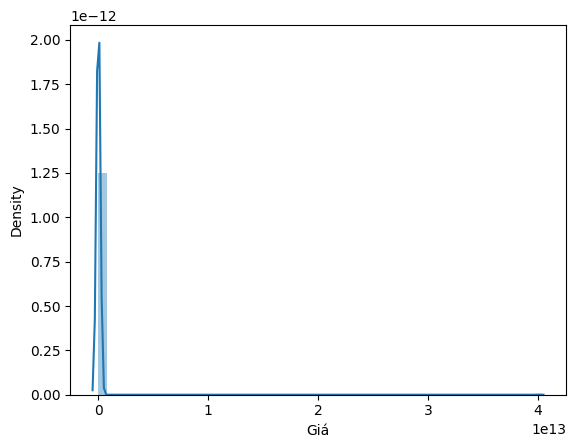

In [224]:
import seaborn as sns

sns.distplot(df['Giá'])

C:\Users\Daniel\AppData\Local\Temp\ipykernel_19464\4065486565.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Giá'])


<Axes: xlabel='Giá', ylabel='Density'>

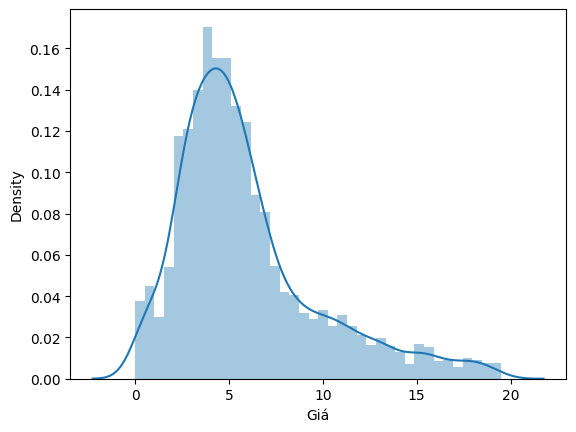

In [225]:
Q1 = df['Giá'].quantile(0.25)
Q3 = df['Giá'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df = df[df['Giá'] <= upper_bound]

sns.distplot(df['Giá'])

In [226]:
grouped_data = df.groupby("Tỉnh/Thành").apply(lambda x: x['Giá'].sum() *1000 / x['Diện tích(m2)'].sum())
TinhThanh_df = grouped_data.reset_index()
TinhThanh_df.columns.values[1] = "Giá trên m2"
TinhThanh_df

C:\Users\Daniel\AppData\Local\Temp\ipykernel_19464\276994574.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = df.groupby("Tỉnh/Thành").apply(lambda x: x['Giá'].sum() *1000 / x['Diện tích(m2)'].sum())


,Tỉnh/Thành,Giá trên m2
0,An Giang,20.891429
1,Bà Rịa Vũng Tàu,30.136585
2,Bình Dương,40.251870
3,Bình Phước,3.979058
4,Bình Thuận,0.018023
5,Bình Định,66.666667
6,Bắc Ninh,45.555556
7,Bến Tre,28.000000
8,Cà Mau,28.125000
9,Cần Thơ,18.783784


In [227]:
df.head()

,Diện tích(m2),Số phòng ngủ,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Số phòng WC,Giá
801,36.0,3.0,22/11/2023,Hà Nội,Tây Hồ,Bán Nhà riêng,2.0,3.30
802,33.0,3.0,22/11/2023,Hà Nội,Hà Đông,Bán Nhà riêng,4.0,3.70
803,72.0,3.0,22/11/2023,TP Hồ Chí Minh,Tân Phú,Bán Nhà riêng,3.0,6.85
804,70.0,3.0,22/11/2023,Bình Dương,Dĩ An,Bán Nhà riêng,2.0,2.90
805,73.0,5.0,22/11/2023,TP Hồ Chí Minh,Gò Vấp,Bán Nhà riêng,6.0,9.00


### Encoding variable

In [228]:
from sklearn.preprocessing import LabelEncoder

le_time = LabelEncoder()
df['Thời gian đăng'] = le_time.fit_transform(df['Thời gian đăng'])
le_city = LabelEncoder()
df['Tỉnh/Thành'] = le_city.fit_transform(df['Tỉnh/Thành'])
le_district = LabelEncoder()
df['Quận/Huyện'] = le_district.fit_transform(df['Quận/Huyện'])
le_house_type = LabelEncoder()
df['Loại nhà'] = le_house_type.fit_transform(df['Loại nhà'])

df.head()

,Diện tích(m2),Số phòng ngủ,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Số phòng WC,Giá
801,36.0,3.0,115,10,86,4,2.0,3.30
802,33.0,3.0,115,10,32,4,4.0,3.70
803,72.0,3.0,115,21,84,4,3.0,6.85
804,70.0,3.0,115,2,23,4,2.0,2.90
805,73.0,5.0,115,21,26,4,6.0,9.00


### Scale dữ liệu về cùng tỉ lệ để đưa vào model

In [229]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = df.copy()
for column in df.columns:
  if column != 'Giá':
    scaled_df[column] = scaler.fit_transform(df[[column]])

In [230]:
X = df.drop(columns=['Giá']).values
y = df['Giá'].values

In [231]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
print(X_train.shape)
print(X_test.shape)

(2679, 7)
(670, 7)


### Xây dựng model Regression bằng pytorch

In [234]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [235]:
class HousePriceModel(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = HousePriceModel(input_dim)

In [236]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Huấn luyện model

In [237]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [100/1000], Loss: 12.0983
Epoch [200/1000], Loss: 9.8673
Epoch [300/1000], Loss: 8.9854
Epoch [400/1000], Loss: 8.3911
Epoch [500/1000], Loss: 8.0430
Epoch [600/1000], Loss: 7.8485
Epoch [700/1000], Loss: 7.7057
Epoch [800/1000], Loss: 7.5937
Epoch [900/1000], Loss: 7.5209
Epoch [1000/1000], Loss: 7.4011


In [238]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    
    mse = mean_squared_error(y_test_tensor.numpy(), y_pred.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), y_pred.numpy())
    r2 = r2_score(y_test_tensor.numpy(), y_pred.numpy())

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Squared Error: 8.669855117797852
Mean Absolute Error: 2.0471434593200684
R² Score: 0.4446277190947844


### Dùng thử các model khác 

In [239]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [240]:
# Define list of models
models = [
    LinearRegression(),
    Ridge(alpha=0.1, random_state=42),
    Lasso(alpha=0.1, random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42)
]

# Train and evaluate each model
for model in models:
    # Train model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate model on training data
    train_preds = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_r2 = r2_score(y_train, train_preds)

    # Evaluate model on test data
    test_preds = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_r2 = r2_score(y_test, test_preds)

    print(f"Model: {model.__class__.__name__}")
    print("Training performance:")
    print(f"MSE: {train_mse:.4f}")
    print(f"MAE: {train_mae:.4f}")
    print(f"R2-score: {train_r2:.4f}")
    print("Testing performance:")
    print(f"MSE: {test_mse:.4f}")
    print(f"MAE: {test_mae:.4f}")
    print(f"R2-score: {test_r2:.4f}")
    print()

Model: LinearRegression
Training performance:
MSE: 11.8246
MAE: 2.4689
R2-score: 0.1736
Testing performance:
MSE: 11.4425
MAE: 2.4839
R2-score: 0.2670

Model: Ridge
Training performance:
MSE: 11.8246
MAE: 2.4689
R2-score: 0.1736
Testing performance:
MSE: 11.4425
MAE: 2.4839
R2-score: 0.2670

Model: Lasso
Training performance:
MSE: 11.8477
MAE: 2.4758
R2-score: 0.1720
Testing performance:
MSE: 11.5361
MAE: 2.5098
R2-score: 0.2610

Model: DecisionTreeRegressor
Training performance:
MSE: 0.0012
MAE: 0.0026
R2-score: 0.9999
Testing performance:
MSE: 10.9605
MAE: 1.9347
R2-score: 0.2979

Model: RandomForestRegressor
Training performance:
MSE: 0.8357
MAE: 0.5895
R2-score: 0.9416
Testing performance:
MSE: 5.5593
MAE: 1.5319
R2-score: 0.6439

Model: GradientBoostingRegressor
Training performance:
MSE: 5.1805
MAE: 1.5756
R2-score: 0.6380
Testing performance:
MSE: 6.1178
MAE: 1.6626
R2-score: 0.6081



### Hyperparameter tuning

### Đánh giá Bias và Variance

### Đánh giá các model bằng Cross-Validation